In [8]:
!pip install ipywidgets


In [30]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import ipywidgets as widgets

# Folder containing .pkl scenario files
scenario_folder = "output/output_0"

# Get full paths to all .pkl files
scenario_paths = sorted([
    os.path.join(scenario_folder, f)
    for f in os.listdir(scenario_folder)
    if f.endswith(".pkl")
])

# Load all scenarios into memory
'''scenarios = []
for path in scenario_paths:
    with open(path, "rb") as f:
        scenarios.append(pickle.load(f))

print(f"Loaded {len(scenarios)} scenarios.")'''





'scenarios = []\nfor path in scenario_paths:\n    with open(path, "rb") as f:\n        scenarios.append(pickle.load(f))\n\nprint(f"Loaded {len(scenarios)} scenarios.")'

In [24]:
def animate_scenario(scenario, title=""):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)
    ax.set_aspect("equal")

    all_tracks = scenario.get("objects", {})
    
    # Select only objects that have both 'position' and 'valid'
    valid_ids = [
        obj_id for obj_id, obj in all_tracks.items()
        if "position" in obj and "valid" in obj and len(obj["position"]) > 0
    ]

    if not valid_ids:
        raise ValueError("No valid objects with 'position' and 'valid' found in scenario.")

    colors = plt.cm.get_cmap('tab10', len(valid_ids))
    lines = []
    for i, obj_id in enumerate(valid_ids):
        line, = ax.plot([], [], label=obj_id, lw=2, color=colors(i % 10))
        lines.append(line)

    def init():
        ax.set_xlim(-50, 50)
        ax.set_ylim(-50, 50)
        return lines

    def update(frame):
        for i, obj_id in enumerate(valid_ids):
            obj = all_tracks[obj_id]
            if frame < len(obj["valid"]) and obj["valid"][frame]:
                pos = obj["position"][frame]
                if len(pos) >= 2:
                    xdata, ydata = lines[i].get_xdata(), lines[i].get_ydata()
                    lines[i].set_data(np.append(xdata, pos[0]), np.append(ydata, pos[1]))
        return lines

    max_frames = max(len(all_tracks[obj_id]["position"]) for obj_id in valid_ids)
    ani = animation.FuncAnimation(fig, update, frames=max_frames, init_func=init,
                                  blit=True, interval=100)
    plt.legend(loc="upper right", fontsize="small")
    plt.close(fig)
    return ani


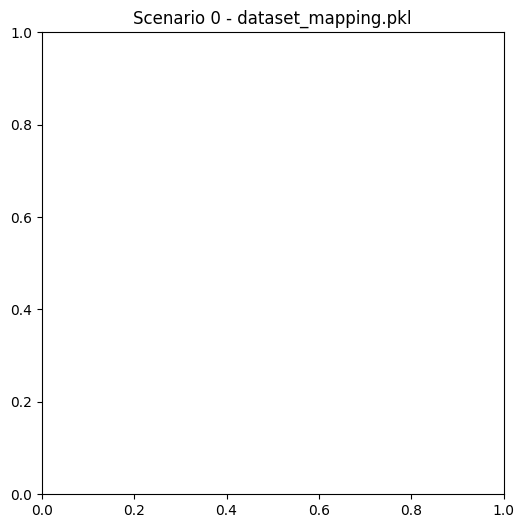

interactive(children=(IntSlider(value=0, description='index', max=6), Output()), _dom_classes=('widget-interac…

<function __main__.show_scenario(index)>

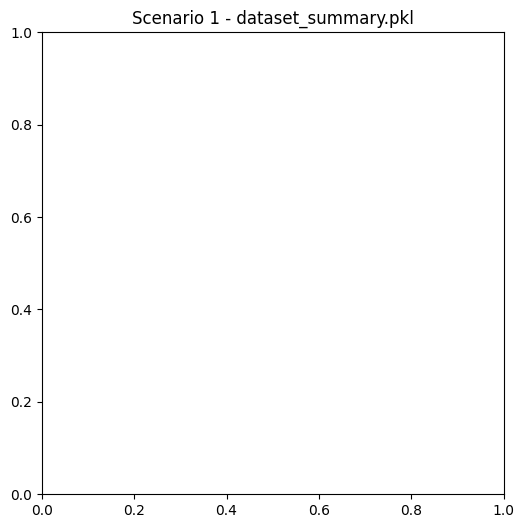

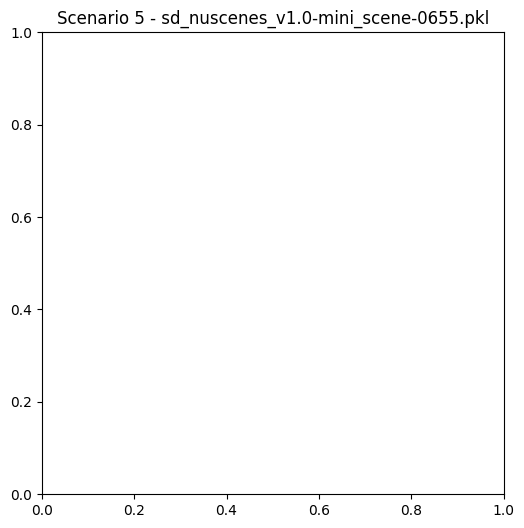

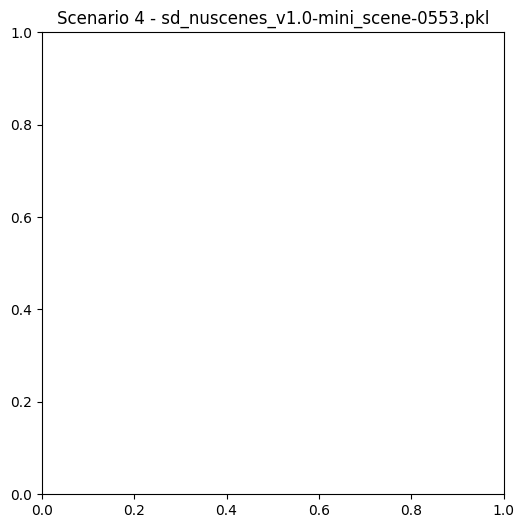

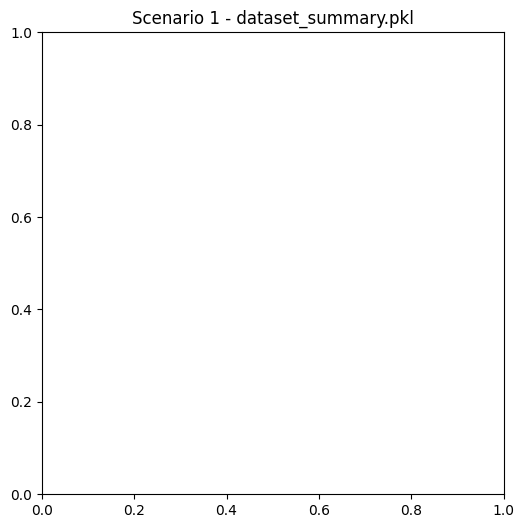

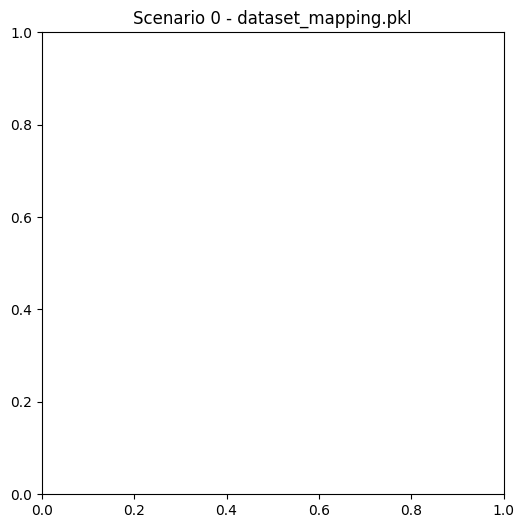

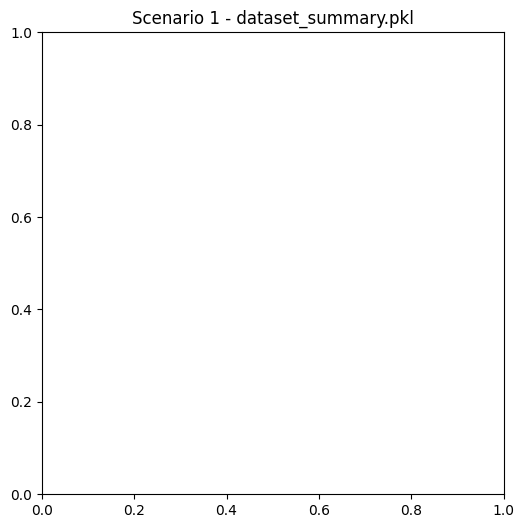

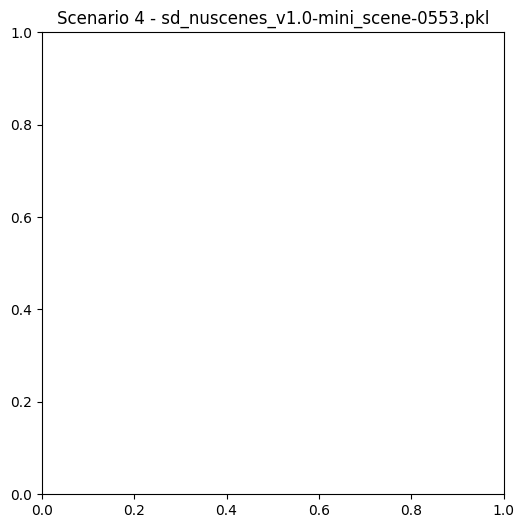

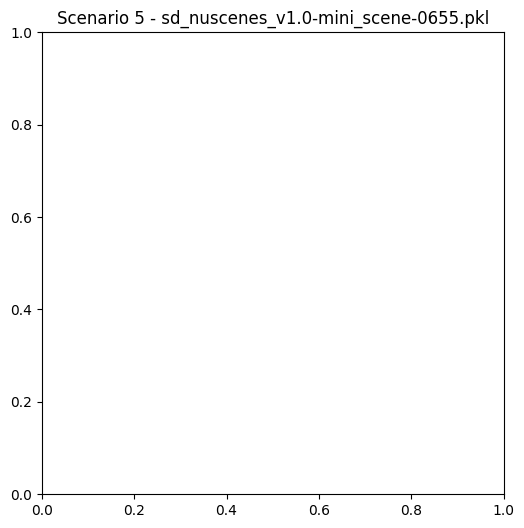

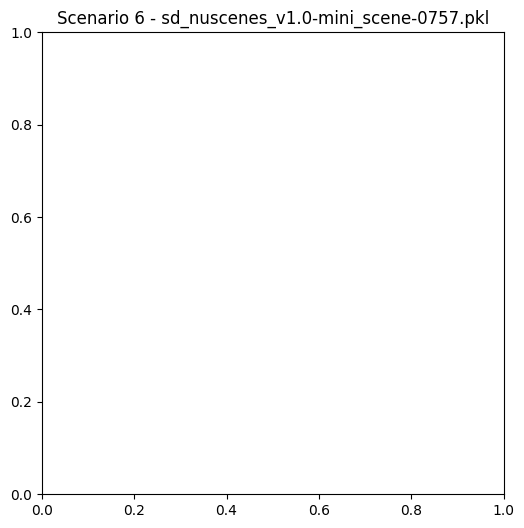

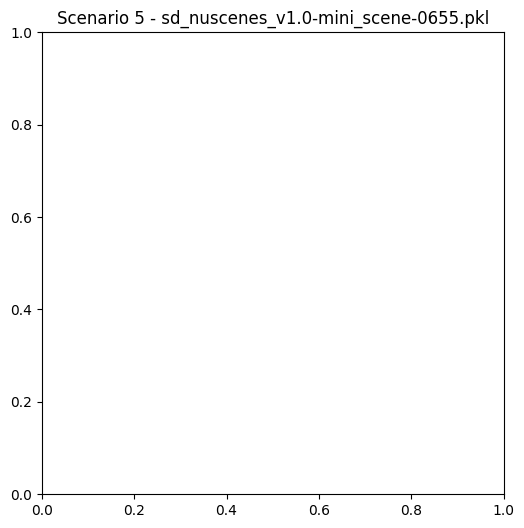

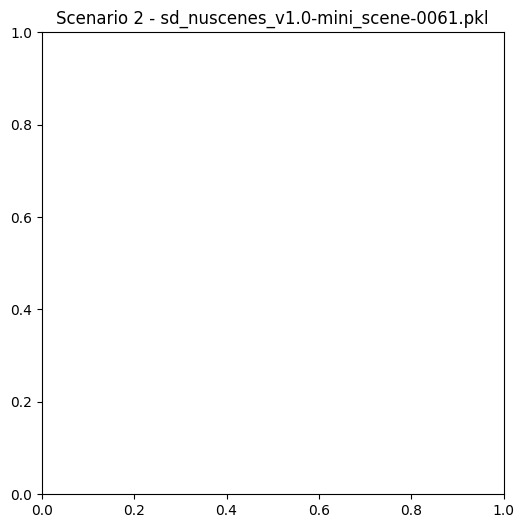

In [25]:
def show_scenario(index):
    title = f"Scenario {index} - {os.path.basename(scenario_paths[index])}"
    ani = animate_scenario(scenarios[index], title)
    display(HTML(ani.to_jshtml()))

widgets.interact(show_scenario, index=widgets.IntSlider(0, 0, len(scenarios) - 1))


In [ ]:
|